# Prepare a model for prediction of prostate cancer using KNN Classifier.

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report , confusion_matrix 
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split

In [2]:
df = pd.read_csv(r"C:\Users\faizu\OneDrive\Desktop\prostate.csv")

In [3]:
df.shape

(97, 9)

In [4]:
y = df['Target']
x = df.drop('Target',axis = 1)

In [5]:
# feature Scaling
scaler = StandardScaler() 
df1 = pd.DataFrame(scaler.fit_transform(x),columns = df.columns[:-1])

In [6]:
x_train , x_test , y_train , y_test = train_test_split(x , y , random_state = 1, test_size = 0.3) 

In [7]:
KNN_model = KNeighborsClassifier(n_neighbors = 1) 
KNN_model.fit(x_train,y_train)

KNeighborsClassifier(n_neighbors=1)

In [8]:
y_pred = KNN_model.predict(x_test)

In [9]:
print(confusion_matrix(y_test,y_pred))

[[18  4]
 [ 6  2]]


In [10]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.75      0.82      0.78        22
           1       0.33      0.25      0.29         8

    accuracy                           0.67        30
   macro avg       0.54      0.53      0.53        30
weighted avg       0.64      0.67      0.65        30



elbow method is used give the number of neighbors for predicting a new data point correctly.  

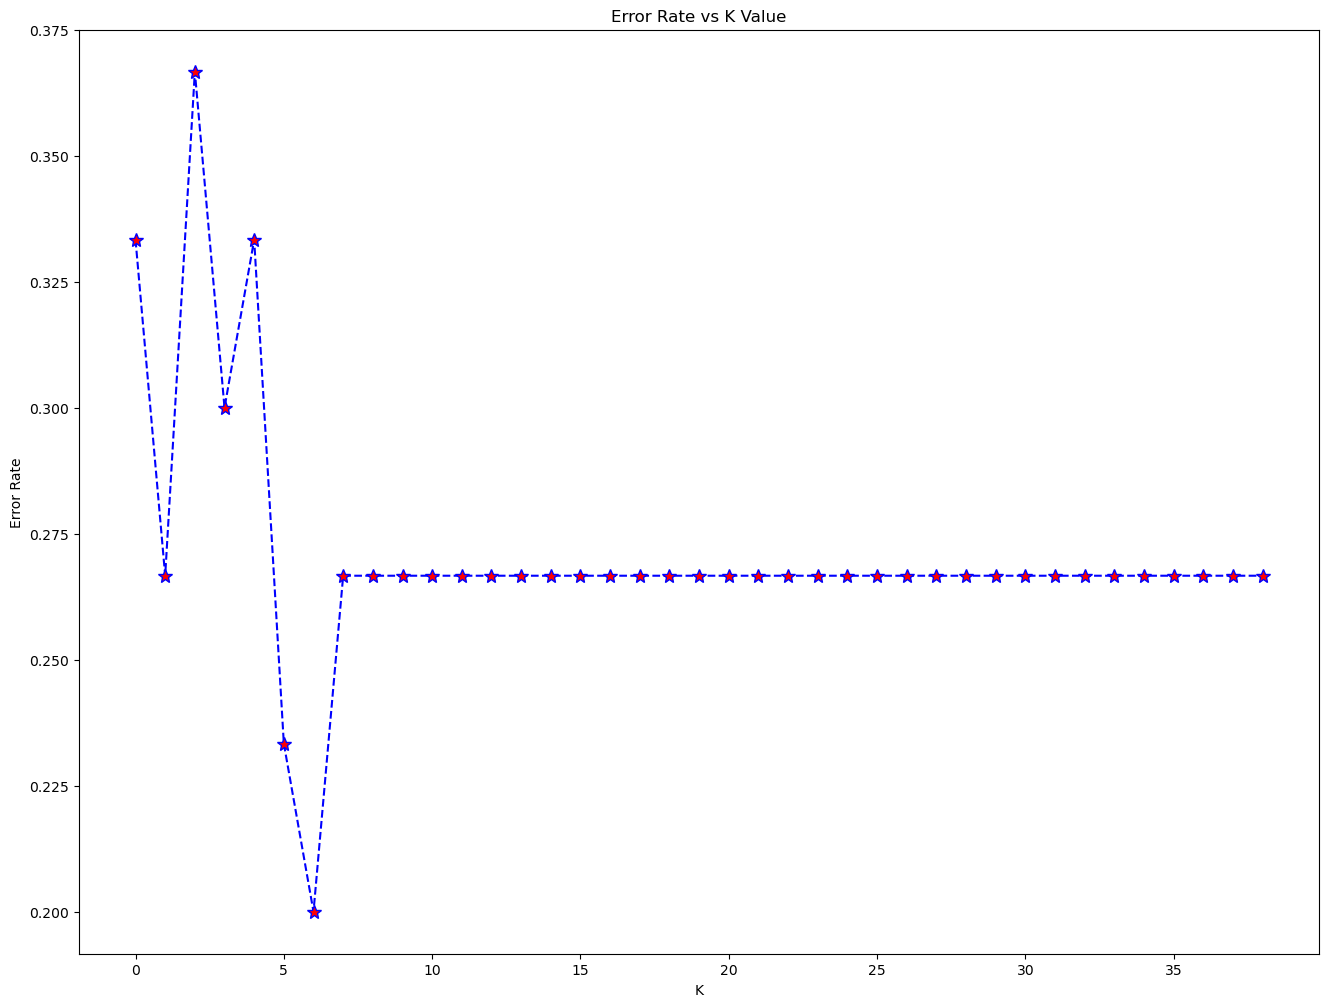

In [11]:
# elbow Method for calculating the number of neighbors 

error_rate = []

for i in range(1,40) :
    Knn = KNeighborsClassifier(n_neighbors = i)
    Knn.fit(x_train,y_train)
    new_y_pred = Knn.predict(x_test)
    error_rate.append(np.mean(new_y_pred != y_test))

plt.figure(figsize = (16,12))
plt.plot(error_rate , color = 'blue',
            linestyle = 'dashed',marker = '*',markerfacecolor = 'red',markersize = 10)

plt.title('Error Rate vs K Value')
plt.xlabel('K')
plt.ylabel('Error Rate')
plt.show()